# Data Preprocessing
1. Filter and manipulate merged data to get data matrix for prediction
2. Perform normalization of raw microbial read counts.

Output files:
1. brca_vs_others.csv
2. brca_vs_normal_raw.csv
3. brca_vs_normal.csv

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Pre-Processing for BRCA vs Other Cancers 

In [60]:
mergedData = pd.read_csv("mergedDataFull.csv")
mergedData.iloc[:, 0:295].head()

,sampleid,Pneumocystis,Candida,Saccharomyces,Fusarium,Cyphellophora,Penicillium,Aspergillus,Malassezia,Jonquetella,...,Phikzvirus,Tunavirus,Rhadinovirus,Elvirus,Chivirus,Jiaodavirus,Webervirus,Vectrevirus,Alphapolyomavirus,Fromanvirus
0,13722.58cfa82ee4b0c9d6adf6afe3,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
1,13722.58cfa82ee4b0c9d6adf6aeb0,0,1,0,4,0,0,1,14,0,...,0,0,0,0,0,0,0,0,0,0
2,13722.58cfa82ee4b0c9d6adf6b1e4,0,16,1,0,0,0,0,93,0,...,0,0,0,0,0,0,0,0,0,0
3,13722.58cfa830e4b0c9d6adf6bd98,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13767.58cfa83be4b0c9d6adf72130,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#coding BRCA and other cancer types
mergedData['disease_type'] = mergedData['disease_type'].apply(lambda x: 'BRCA' if x == 'Breast Invasive Carcinoma' else 'Other')

Other    7523
BRCA      304
Name: disease_type, dtype: int64


([0, 1], [Text(0, 0, 'Other'), Text(1, 0, 'BRCA')])

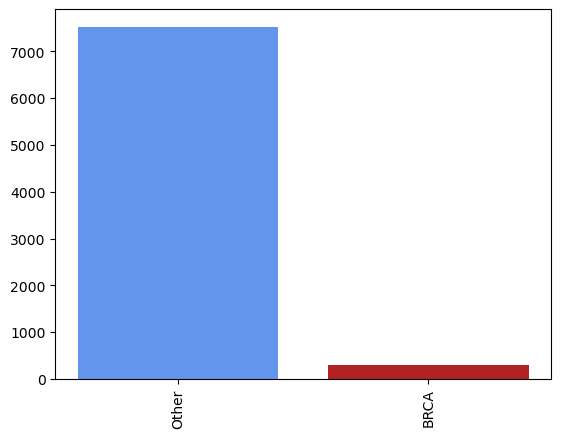

In [64]:
sampleCounts = mergedData['disease_type'].value_counts()
print(sampleCounts)
plt.bar(sampleCounts.index, 
        sampleCounts.values,
        color = ['cornflowerblue', 'firebrick'])
plt.xticks(rotation=90)

In [65]:
#subsetting to include disease_type column along with microbiome matrix
brca_vs_others = mergedData.iloc[: , 0:295]
brca_vs_others["disease_type"] = mergedData['disease_type']
brca_vs_others.set_index('sampleid', 
                         inplace=True)

In [66]:
#normalization
brca_vs_others_logNormalized = np.log((brca_vs_others.iloc[: , 0:294].div(brca_vs_others.iloc[: , 0:294].sum(axis=1), axis=0)) + 1e-10)
brca_vs_others_logNormalized['disease_type'] = brca_vs_others['disease_type']

In [67]:
brca_vs_others_logNormalized.to_csv("brca_vs_others.csv")

## Data Pre-Processing for BRCA vs Normal

In [68]:
mergedData = pd.read_csv("mergedDataFull.csv")

In [69]:
#brca = mergedData[(mergedData['sample_type'] == "Blood Derived Normal") | (mergedData['sample_type'] == "Solid Tissue Normal") | (mergedData['sample_type'] == "Primary Tumor")]
#brca = mergedData[(mergedData['sample_type'] == "Blood Derived Normal") | (mergedData['sample_type'] == "Solid Tissue Normal") | ((mergedData['sample_type'] == "Primary Tumor")&(mergedData['disease_type'] == "Breast Invasive Carcinoma"))]
#brca = mergedData[(mergedData['data_submitting_center_label'] == "University of North Carolina") | 
#                  (mergedData['data_submitting_center_label'] == "Washington University School of Medicine")]

#selecting BRCA samples
brca = mergedData[mergedData['disease_type'] == "Breast Invasive Carcinoma"]

In [70]:
#summarizing data with only BRCA samples
print(brca[['sample_type']].describe())
print(brca[['disease_type']].describe())
brca.shape

          sample_type
count             304
unique              4
top     Primary Tumor
freq              174
                     disease_type
count                         304
unique                          1
top     Breast Invasive Carcinoma
freq                          304


(304, 339)

Primary Tumor           174
Blood Derived Normal    107
Solid Tissue Normal      21
Metastatic                2
Name: sample_type, dtype: int64


([0, 1, 2, 3],
 [Text(0, 0, 'Primary Tumor'),
  Text(1, 0, 'Blood Derived Normal'),
  Text(2, 0, 'Solid Tissue Normal'),
  Text(3, 0, 'Metastatic')])

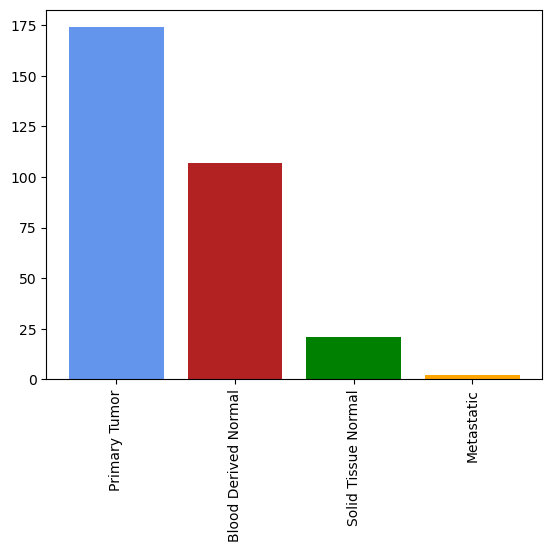

In [73]:
sampleCounts = brca['sample_type'].value_counts()
print(sampleCounts)
plt.bar(sampleCounts.index, 
        sampleCounts.values,
        color = ['cornflowerblue', 'firebrick', 'green', 'orange'])
plt.xticks(rotation=90)

In [74]:
cols = list(range(0, 295))
brca_vs_normal = brca.iloc[ : , cols]
brca_vs_normal['sample_type'] = brca[['sample_type']]
brca_vs_normal['center'] = brca[['data_submitting_center_label']]

In [75]:
brca_vs_normal['sample_type'] = brca_vs_normal['sample_type'].replace('Primary Tumor', 'brca')
brca_vs_normal['sample_type'] = brca_vs_normal['sample_type'].replace('Blood Derived Normal', 'normal')
brca_vs_normal['sample_type'] = brca_vs_normal['sample_type'].replace('Solid Tissue Normal', 'normal')
brca_vs_normal['sample_type'] = brca_vs_normal['sample_type'].replace('Metastatic', 'brca')
brca_vs_normal['sample_type'] = brca_vs_normal['sample_type'].replace('Recurrent Tumor', 'brca')
brca_vs_normal['sample_type'] = brca_vs_normal['sample_type'].replace('Primary Blood Derived Cancer - Peripheral Blood', 'brca')


print(brca_vs_normal[['sample_type']].describe())
#print(brca_vs_normal)

       sample_type
count          304
unique           2
top           brca
freq           176


In [76]:
#making sample id as rownames
brca_vs_normal.set_index('sampleid', 
                         inplace=True)

([0, 1], [Text(0, 0, 'brca'), Text(1, 0, 'normal')])

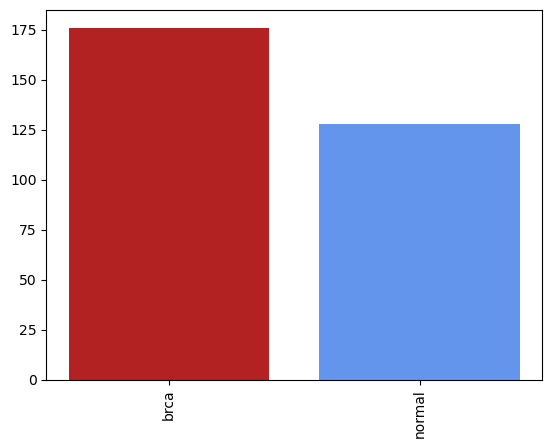

In [78]:
codedSampleCounts = brca_vs_normal['sample_type'].value_counts()
#codedSampleCounts
plt.bar(codedSampleCounts.index, 
        codedSampleCounts.values, 
        color = ['firebrick', 'cornflowerblue'])
plt.xticks(rotation=90)

In [79]:
brca_vs_normal.to_csv("brca_vs_normal_raw.csv")

In [80]:
brca_vs_normal.iloc[: , 0:294] = brca_vs_normal.iloc[: , 0:294].replace(0, 1e-10)
brca_vs_normal_logNormalized = np.log((brca_vs_normal.iloc[: , 0:294].div(brca_vs_normal.iloc[: , 0:294].sum(axis=1), axis=0)) + 1e-10)
brca_vs_normal_logNormalized['sample_type'] = brca_vs_normal['sample_type']
brca_vs_normal_logNormalized['center'] = brca_vs_normal['center']

In [81]:
brca_vs_normal_logNormalized.to_csv('brca_vs_normal.csv', index=False)